In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
#Importing csv files
#example.txt is own created file which contains the list of players who will play in 2019

matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
player_2019 = pd.read_csv('example.txt',header = None)
player_2019.set_index(0, inplace = True)
print(player_2019.head())

Empty DataFrame
Columns: []
Index: [A Mishra, A Singh, A Zampa, AB Dinda, AB de Villiers]


In [3]:
#Teams
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [4]:
#venues
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 696
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


In [5]:
#Toss winning team decision
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    71.577123
bat      49.046794
Name: toss_decision, dtype: float64


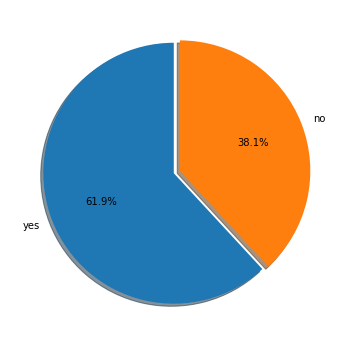

In [6]:
#Is the toss winner also the match winner
df = matches[matches['toss_winner']==matches['winner']]
slices = [len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [7]:
#Matches according to season
match_season = [0]*11
match_season[0] = matches[matches.season == 2008]
match_season[1] = matches[matches.season == 2009]
match_season[2] = matches[matches.season == 2010]
match_season[3] = matches[matches.season == 2011]
match_season[4] = matches[matches.season == 2012]
match_season[5] = matches[matches.season == 2013]
match_season[6] = matches[matches.season == 2014]
match_season[7] = matches[matches.season == 2015]
match_season[8] = matches[matches.season == 2016]
match_season[9] = matches[matches.season == 2017]
match_season[10] = matches[matches.season == 2018]

## Batsman Analysis

In [8]:
#All batsman overall performance till 2018

ball_faced = pd.DataFrame(delivery['batsman'].value_counts())
max_runs = delivery.groupby(['batsman'])['batsman_runs'].sum()
ax = pd.DataFrame(max_runs.sort_values(ascending=False))
overall_batsman= ax.merge(ball_faced,how='outer', left_index=True, right_index=True)
overall_batsman.rename(columns={"batsman":"Total_ball_faced", "batsman_runs":"Total_batsman_runs"},inplace=True)
overall_batsman['Net_strike_rate'] = (overall_batsman['Total_batsman_runs']/overall_batsman['Total_ball_faced'] *100).round(2)
overall_batsman = player_2019.merge(overall_batsman, how='inner', left_index=True, right_index=True)
print(overall_batsman.head())

                Total_batsman_runs  Total_ball_faced  Net_strike_rate
A Mishra                       341               384            88.80
A Singh                          2                10            20.00
A Zampa                          5                 8            62.50
AB Dinda                        26                50            52.00
AB de Villiers                3974              2683           148.12


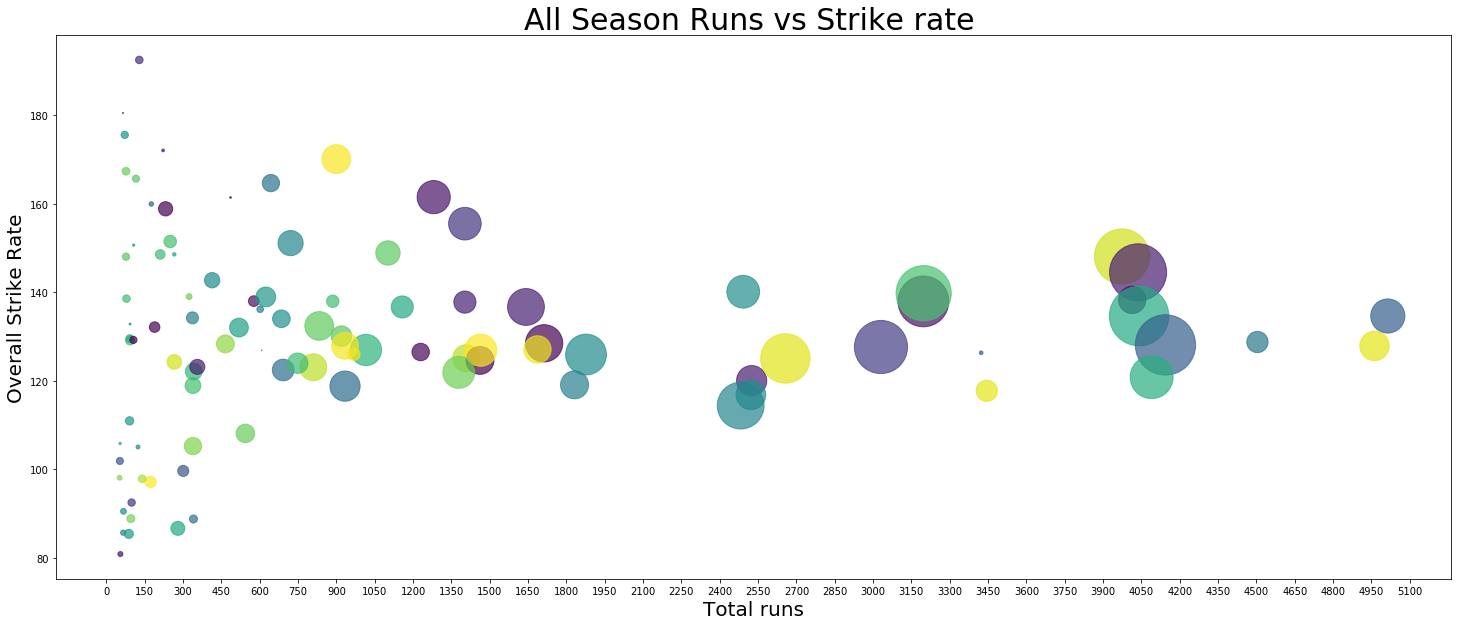

In [9]:
#All player batting performance visulisation

plt.figure(figsize=(25,10))
colors = np.random.rand(len(overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>50].tolist()))
# s = np.linspace(1,600,num=len(overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>10].tolist()))
s = np.random.rand(len(overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>50].tolist()))*np.array(overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>50].tolist())
plt.scatter(overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>50], overall_batsman['Net_strike_rate'][overall_batsman['Total_batsman_runs']>50],s=s, c=colors, alpha=0.7)
plt.xticks(np.arange(0,5200, step=150))
plt.title('All Season Runs vs Strike rate ', fontsize=30)
plt.xlabel('Total runs', fontsize=20)
plt.ylabel('Overall Strike Rate', fontsize=20)
plt.show()

In [10]:
#Strike Rate vs Batsman

trace = go.Scatter(
    y = overall_batsman['Net_strike_rate'][overall_batsman['Total_batsman_runs']>500],
    x = overall_batsman[overall_batsman['Total_batsman_runs']>500].index.values,
    mode='markers',
    marker=dict(
        size= overall_batsman['Net_strike_rate'].values *0.4,
        color = overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>500].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Batsman Runs'),
    ),
    text = overall_batsman['Total_batsman_runs'][overall_batsman['Total_batsman_runs']>500].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Batsman Visulisation',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Batsman',
    ),
    yaxis=dict(
        title= 'Strike rate',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

### Per Season Batsman Performance Calculation

In [11]:
del_per_season = [0]*len(match_season)
for i in range(0,len(match_season)):
    del_per_season[i] = delivery[(match_season[i].id.values[0]<=delivery['match_id']) & (delivery['match_id']<=match_season[i].id.values[len(match_season[i].id.values)-1])]

In [12]:
ball_faced_per_season = [0]*len(match_season)
runs_per_season = [0]*len(match_season)
merged = [0]*len(match_season)
temp = [0]*len(match_season)
for i in range(0, len(match_season)):
    ball_faced_per_season[i] = pd.DataFrame(del_per_season[i]['batsman'].value_counts())
    runs_per_season[i] = pd.DataFrame(del_per_season[i].groupby(['batsman'])['batsman_runs'].sum())
    temp[i] = overall_batsman.merge(runs_per_season[i], how='left', left_index=True, right_index=True)
    merged[i] = temp[i].merge(ball_faced_per_season[i], how='left', left_index=True, right_index=True)
    merged[i].rename(columns={"batsman":"ball_faced"},inplace=True)
    merged[i]['strike_rate'] = (merged[i]['batsman_runs']/merged[i]['ball_faced'] *100).round(2)    

In [13]:
for i in range(0,len(match_season)):
    merged[i].drop(['Total_batsman_runs', 'Total_ball_faced', 'Net_strike_rate'], axis=1, inplace=True)

In [14]:
#batsman runs
temp_df_run = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_run[str(j)] = merged[i]['batsman_runs']
    j = j+1

temp_df_run.fillna(method='ffill', axis=1, inplace=True)
temp_df_run.fillna(method='bfill', axis=1, inplace=True)
print(temp_df_run.head())

#strike rate
temp_df_sr = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_sr[str(j)] = merged[i]['strike_rate']
    j = j+1

temp_df_sr.fillna(method='ffill', axis=1, inplace=True)
temp_df_sr.fillna(method='bfill', axis=1, inplace=True)
print(temp_df_sr.head())

                2008   2009   2010   2011   2012   2013   2014   2015   2016  \
A Mishra        37.0   26.0   39.0   68.0   16.0   89.0    4.0    8.0    4.0   
A Singh          1.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   
A Zampa          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AB Dinda         2.0    2.0    0.0    0.0    2.0    9.0    4.0    4.0    4.0   
AB de Villiers  95.0  465.0  111.0  312.0  319.0  373.0  395.0  513.0  687.0   

                 2017   2018  
A Mishra         49.0    1.0  
A Singh           0.0    0.0  
A Zampa           5.0    5.0  
AB Dinda          7.0    7.0  
AB de Villiers  216.0  488.0  
                 2008    2009   2010    2011    2012    2013    2014    2015  \
A Mishra        88.10  130.00  72.22  130.77   76.19   86.41   57.14   61.54   
A Singh         33.33   33.33  33.33   25.00    0.00    0.00    0.00    0.00   
A Zampa          0.00    0.00   0.00    0.00    0.00    0.00    0.00    0.00   
AB Dinda     

In [15]:
j = 2008
for i in range(0, len(match_season)):
    merged[i]['batsman_runs'] = temp_df_run[str(j)]
    merged[i]['strike_rate'] = temp_df_sr[str(j)]
    j = j+1

In [16]:
df = pd.DataFrame()
j = 2008
for i in range(0,len(match_season)):
#     merged[i].fillna(0, inplace = True)
    df[str(j)] = merged[i].apply(lambda row : {'batsman_run':row['batsman_runs'], 'strike_rate':row['strike_rate'] },axis = 1)
    j = j+1

In [17]:
df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
A Mishra,"{'strike_rate': 88.1, 'batsman_run': 37.0}","{'strike_rate': 130.0, 'batsman_run': 26.0}","{'strike_rate': 72.22, 'batsman_run': 39.0}","{'strike_rate': 130.77, 'batsman_run': 68.0}","{'strike_rate': 76.19, 'batsman_run': 16.0}","{'strike_rate': 86.41, 'batsman_run': 89.0}","{'strike_rate': 57.14, 'batsman_run': 4.0}","{'strike_rate': 61.54, 'batsman_run': 8.0}","{'strike_rate': 28.57, 'batsman_run': 4.0}","{'strike_rate': 87.5, 'batsman_run': 49.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}"
A Singh,"{'strike_rate': 33.33, 'batsman_run': 1.0}","{'strike_rate': 33.33, 'batsman_run': 1.0}","{'strike_rate': 33.33, 'batsman_run': 1.0}","{'strike_rate': 25.0, 'batsman_run': 1.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}"
A Zampa,"{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 71.43, 'batsman_run': 5.0}","{'strike_rate': 71.43, 'batsman_run': 5.0}"
AB Dinda,"{'strike_rate': 50.0, 'batsman_run': 2.0}","{'strike_rate': 66.67, 'batsman_run': 2.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 0.0, 'batsman_run': 0.0}","{'strike_rate': 40.0, 'batsman_run': 2.0}","{'strike_rate': 81.82, 'batsman_run': 9.0}","{'strike_rate': 30.77, 'batsman_run': 4.0}","{'strike_rate': 30.77, 'batsman_run': 4.0}","{'strike_rate': 30.77, 'batsman_run': 4.0}","{'strike_rate': 87.5, 'batsman_run': 7.0}","{'strike_rate': 87.5, 'batsman_run': 7.0}"
AB de Villiers,"{'strike_rate': 95.0, 'batsman_run': 95.0}","{'strike_rate': 129.53, 'batsman_run': 465.0}","{'strike_rate': 90.24, 'batsman_run': 111.0}","{'strike_rate': 125.81, 'batsman_run': 312.0}","{'strike_rate': 157.14, 'batsman_run': 319.0}","{'strike_rate': 165.04, 'batsman_run': 373.0}","{'strike_rate': 154.9, 'batsman_run': 395.0}","{'strike_rate': 169.87, 'batsman_run': 513.0}","{'strike_rate': 165.54, 'batsman_run': 687.0}","{'strike_rate': 126.32, 'batsman_run': 216.0}","{'strike_rate': 173.67, 'batsman_run': 488.0}"


### 2019 batsman performance calculation

In [18]:
def run(year):
    return np.array([d['batsman_run'] for d in df[year].values])

runs_2019 = (run('2008')+run('2009')+run('2010')+run('2011')+run('2012')+run('2013')+run('2014')+run('2015')+run('2016')+run('2017')+run('2018'))/10
runs_2019 = list(map(lambda x: int(x), runs_2019))
print(len(runs_2019))

def sr(year):
    return np.array([d['strike_rate'] for d in df[year].values])

sr_2019 = (sr('2008')+sr('2009')+sr('2010')+sr('2011')+sr('2012')+sr('2013')+sr('2014')+sr('2015')+sr('2016')+sr('2017')+sr('2018'))/10
sr_2019 = list(map(lambda x: float(x), sr_2019))
sr_2019 = list(np.around(sr_2019, 2))
print(len(sr_2019))

df_2019 = pd.DataFrame({'batsman_runs': runs_2019, 'strike_rate': sr_2019},index = df.index)
df['2019'] = df_2019.apply(lambda row : {'batsman_run':row['batsman_runs'], 'strike_rate':row['strike_rate'] },axis = 1)

143
143


### 2019 players batting performance visualisation

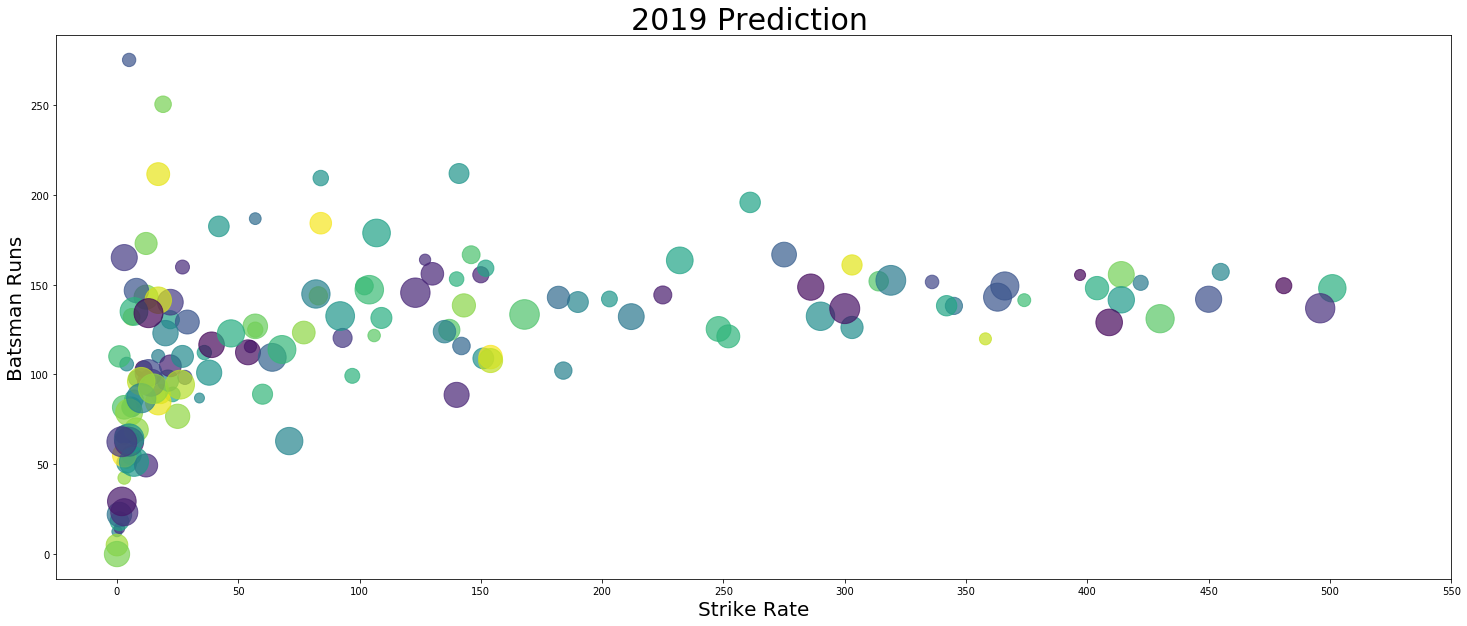

In [19]:
plt.figure(figsize=(25,10))
colors = np.random.rand(len(df_2019['batsman_runs'].tolist()))
s = np.linspace(100,900,num=len(df_2019['batsman_runs'].tolist()))
# s = np.random.rand(len(df_2019['batsman_runs'].tolist()))*15*np.array(df_2019['batsman_runs'].tolist())
plt.scatter(df_2019['batsman_runs'], df_2019['strike_rate'],s=s, c=colors, alpha=0.7)
plt.title('2019 Prediction ', fontsize=30)
plt.xlabel('Strike Rate', fontsize=20)
plt.ylabel('Batsman Runs', fontsize=20)
plt.xticks(np.arange(0,600, step=50))
plt.show()

### 2019 strike rate vs players

In [20]:
trace = go.Scatter(
    y = df_2019['strike_rate'][df_2019['batsman_runs']>10],
    x = df_2019['batsman_runs'][df_2019['batsman_runs']>10].index.values,
    mode='markers',
    marker=dict(
        size= df_2019['strike_rate'].values *0.4,
        color = df_2019['batsman_runs'][df_2019['batsman_runs']>10].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Batsman Runs'),
    ),
    text = df_2019['batsman_runs'][df_2019['batsman_runs']>10].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Batsman Visulisation',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Batsman'
    ),
    yaxis=dict(
        title= 'Strike rate',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

In [21]:
df.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
WP Saha,"{'strike_rate': 133.61, 'batsman_run': 159.0}","{'strike_rate': 175.61, 'batsman_run': 72.0}","{'strike_rate': 126.42, 'batsman_run': 67.0}","{'strike_rate': 101.49, 'batsman_run': 68.0}","{'strike_rate': 42.86, 'batsman_run': 6.0}","{'strike_rate': 122.81, 'batsman_run': 70.0}","{'strike_rate': 141.96, 'batsman_run': 362.0}","{'strike_rate': 121.46, 'batsman_run': 249.0}","{'strike_rate': 126.17, 'batsman_run': 270.0}","{'strike_rate': 120.62, 'batsman_run': 234.0}","{'strike_rate': 120.37, 'batsman_run': 130.0}","{'strike_rate': 133.34, 'batsman_run': 168.0}"
Washington Sundar,"{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 75.0, 'batsman_run': 9.0}","{'strike_rate': 170.0, 'batsman_run': 68.0}","{'strike_rate': 92.0, 'batsman_run': 15.0}"
YK Pathan,"{'strike_rate': 171.94, 'batsman_run': 435.0}","{'strike_rate': 135.94, 'batsman_run': 261.0}","{'strike_rate': 158.57, 'batsman_run': 333.0}","{'strike_rate': 138.05, 'batsman_run': 283.0}","{'strike_rate': 108.38, 'batsman_run': 194.0}","{'strike_rate': 134.41, 'batsman_run': 332.0}","{'strike_rate': 159.52, 'batsman_run': 268.0}","{'strike_rate': 128.4, 'batsman_run': 312.0}","{'strike_rate': 141.02, 'batsman_run': 361.0}","{'strike_rate': 116.26, 'batsman_run': 143.0}","{'strike_rate': 130.81, 'batsman_run': 276.0}","{'strike_rate': 152.33, 'batsman_run': 319.0}"
YS Chahal,"{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 1.0}","{'strike_rate': 100.0, 'batsman_run': 1.0}","{'strike_rate': 100.0, 'batsman_run': 1.0}","{'strike_rate': 50.0, 'batsman_run': 13.0}","{'strike_rate': 25.0, 'batsman_run': 1.0}","{'strike_rate': 62.5, 'batsman_run': 2.0}"
Yuvraj Singh,"{'strike_rate': 156.54, 'batsman_run': 299.0}","{'strike_rate': 107.26, 'batsman_run': 340.0}","{'strike_rate': 125.73, 'batsman_run': 259.0}","{'strike_rate': 127.51, 'batsman_run': 343.0}","{'strike_rate': 127.51, 'batsman_run': 343.0}","{'strike_rate': 123.32, 'batsman_run': 238.0}","{'strike_rate': 130.56, 'batsman_run': 376.0}","{'strike_rate': 115.35, 'batsman_run': 248.0}","{'strike_rate': 128.96, 'batsman_run': 236.0}","{'strike_rate': 134.04, 'batsman_run': 252.0}","{'strike_rate': 89.19, 'batsman_run': 66.0}","{'strike_rate': 136.6, 'batsman_run': 300.0}"


## Bowling Prediction

In [22]:
#overs
bowler_df=delivery.groupby(['bowler']).sum()
bowler_df['total balls']=delivery['bowler'].value_counts()
bowler_df['overs']=(bowler_df['total balls']//6)
bowler_df.head()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,total balls,overs
bowler,,,,,,,,,,,,,,,
A Ashish Reddy,109528,442,3805,962,0,8,2,2,2,0,386,14,400,270,45
A Chandila,92700,348,1314,819,0,0,0,3,0,0,242,3,245,234,39
A Choudhary,3146,164,1002,402,0,6,0,0,1,0,137,7,144,108,18
A Dananjaya,197550,50,225,91,0,1,0,0,0,0,47,1,48,25,4
A Flintoff,8028,84,846,231,0,0,1,0,0,0,105,1,106,66,11


In [23]:
#most economical bowler
bowler_df['economy']=(bowler_df['total_runs']/(bowler_df['overs']))
bowler_df[(bowler_df['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,SP Narine,R Ashwin,SL Malinga,Harbhajan Singh,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.6156,6.63824,6.68539,6.75724,7.0283,7.12564,7.32787,7.40432,7.54617,7.61276


In [24]:
#Overall players bowling performance

bowler_df = player_2019.merge(bowler_df, how='inner', left_index=True, right_index=True)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()
bowler_df['wickets'] = ct
bowler_df = bowler_df.iloc[:,-5:]
bowler_df.fillna(0, inplace=True)
bowler_df.head()

,total_runs,total balls,overs,economy,wickets
A Mishra,3576,2929,488,7.327869,146.0
A Singh,639,486,81,7.888889,28.0
A Zampa,281,225,37,7.594595,19.0
AB Dinda,2103,1589,264,7.965909,69.0
AD Russell,1294,890,148,8.743243,44.0


### economy vs bowler plot

In [25]:
trace = go.Scatter(
    y = bowler_df['economy'],
    x = bowler_df.index.values,
    mode='markers',
    marker=dict(
        size= bowler_df['wickets'].values,
        color = bowler_df['wickets'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'wickets'),
    ),
    text = bowler_df['wickets'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers',
    ),
    yaxis=dict(
        title= 'Economy',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

### wickets vs bowler plot

In [26]:
trace = go.Scatter(
    y = bowler_df['wickets'],
    x = bowler_df.index.values,
    mode='markers',
    marker=dict(
        size= bowler_df['wickets'].values,
        color = bowler_df['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'economy'),
    ),
    text = bowler_df['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers',
    ),
    yaxis=dict(
        title= 'wickets',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

### Players Bowling Performance per season

In [27]:
bowlers_per_season = [0]*len(match_season)

for i in range(0, len(match_season)):
    bowlers_per_season[i] = del_per_season[i].groupby(['bowler']).sum()
    bowlers_per_season[i]['ball'] = del_per_season[i]['bowler'].value_counts()
    bowlers_per_season[i]['overs'] = (bowlers_per_season[i]['ball']//6)
    bowlers_per_season[i]['economy'] = (bowlers_per_season[i]['total_runs']/(bowlers_per_season[i]['overs'])).round(2)
    bowlers_per_season[i] = player_2019.merge(bowlers_per_season[i], how='left', left_index=True, right_index=True)
    dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
    ct = del_per_season[i][del_per_season[i]["dismissal_kind"].isin(dismissal_kinds)]
    ct=ct['bowler'].value_counts()
    bowlers_per_season[i]['wickets'] = ct
    bowlers_per_season[i] = bowlers_per_season[i].iloc[:,-4:]


In [28]:
#batsman runs
temp_df_eco = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_eco[str(j)] = bowlers_per_season[i]['economy']
    j = j+1

temp_df_eco.fillna(method='ffill', axis=1, inplace=True)
temp_df_eco.fillna(method='bfill', axis=1, inplace=True)

#strike rate
temp_df_wickets = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_wickets[str(j)] = bowlers_per_season[i]['wickets']
    j = j+1

temp_df_wickets.fillna(method='ffill', axis=1, inplace=True)
temp_df_wickets.fillna(method='bfill', axis=1, inplace=True)

#over
temp_df_over = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_over[str(j)] = bowlers_per_season[i]['overs']
    j = j+1

temp_df_over.fillna(method='ffill', axis=1, inplace=True)
temp_df_over.fillna(method='bfill', axis=1, inplace=True)

#strike rate
temp_df_runs = pd.DataFrame()
j = 2008
for i in range(0, len(match_season)):
    temp_df_runs[str(j)] = bowlers_per_season[i]['total_runs']
    j = j+1

temp_df_runs.fillna(method='ffill', axis=1, inplace=True)
temp_df_runs.fillna(method='bfill', axis=1, inplace=True)


In [29]:
j = 2008
for i in range(0, len(match_season)):
    bowlers_per_season[i]['economy'] = temp_df_eco[str(j)]
    bowlers_per_season[i]['wickets'] = temp_df_wickets[str(j)]
    j = j+1
    
for i in range(0, len(match_season)):
    bowlers_per_season[i].fillna(0, inplace=True)
    
df_1 = pd.DataFrame()
j = 2008
for i in range(0,len(match_season)):
    df_1[str(j)] = bowlers_per_season[i].apply(lambda row : {'wickets':row['wickets'], 'economy':row['economy'] },axis = 1)
    j = j+1

In [30]:
df_1.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,,,,,,,,,,,
A Mishra,"{'economy': 7.0, 'wickets': 11.0}","{'economy': 6.98, 'wickets': 14.0}","{'economy': 6.87, 'wickets': 17.0}","{'economy': 6.83, 'wickets': 19.0}","{'economy': 7.94, 'wickets': 13.0}","{'economy': 6.37, 'wickets': 21.0}","{'economy': 9.0, 'wickets': 7.0}","{'economy': 7.61, 'wickets': 9.0}","{'economy': 7.45, 'wickets': 13.0}","{'economy': 8.85, 'wickets': 10.0}","{'economy': 7.32, 'wickets': 12.0}"
A Singh,"{'economy': 5.88, 'wickets': 9.0}","{'economy': 5.88, 'wickets': 9.0}","{'economy': 5.88, 'wickets': 9.0}","{'economy': 7.66, 'wickets': 9.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}"
A Zampa,"{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 8.2, 'wickets': 7.0}","{'economy': 8.2, 'wickets': 7.0}"
AB Dinda,"{'economy': 6.65, 'wickets': 9.0}","{'economy': 7.8, 'wickets': 4.0}","{'economy': 6.46, 'wickets': 9.0}","{'economy': 9.35, 'wickets': 5.0}","{'economy': 6.84, 'wickets': 9.0}","{'economy': 9.32, 'wickets': 16.0}","{'economy': 8.47, 'wickets': 5.0}","{'economy': 12.6, 'wickets': 5.0}","{'economy': 7.38, 'wickets': 11.0}","{'economy': 12.1, 'wickets': 1.0}","{'economy': 12.1, 'wickets': 1.0}"
AB de Villiers,"{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}"


### 2019 Players bowling performance calculation

In [31]:
def economy(year):
    return np.array([d['economy'] for d in df_1[year].values])
# [d['batsman_run'] for d in df['2009'].values]

economy_2019 = (economy('2008')+economy('2009')+economy('2010')+economy('2011')+economy('2012')+economy('2013')+economy('2014')+economy('2015')+economy('2016')+economy('2017')+economy('2018'))/10
economy_2019 = list(map(lambda x: float(x), economy_2019))
economy_2019 = list(np.around(economy_2019, 2))
print(len(runs_2019))

# print('\n')
def wickets(year):
    return np.array([d['wickets'] for d in df_1[year].values])

wickets_2019 = (wickets('2008')+wickets('2009')+wickets('2010')+wickets('2011')+wickets('2012')+wickets('2013')+wickets('2014')+wickets('2015')+wickets('2016')+wickets('2017')+wickets('2018'))/10
wickets_2019 = list(map(lambda x: int(x), wickets_2019))
print(len(wickets_2019))

143
143


In [32]:
df_bowler_2019 = pd.DataFrame({'wickets': wickets_2019, 'economy': economy_2019},index = df.index)
df_1['2019'] = df_bowler_2019.apply(lambda row : {'wickets':row['wickets'], 'economy':row['economy'] },axis = 1)

### economy vs bowler plot

In [33]:
trace = go.Scatter(
    y = df_bowler_2019['economy'],
    x = df_bowler_2019.index.values,
    mode='markers',
    marker=dict(
        size= df_bowler_2019['wickets'].values*5,
        color = df_bowler_2019['wickets'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'wickets'),
    ),
    text = df_bowler_2019['wickets'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers',
    ),
    yaxis=dict(
        title= 'Economy',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

### wickets vs bowler plot

In [34]:
trace = go.Scatter(
    y = df_bowler_2019['wickets'],
    x = df_bowler_2019.index.values,
    mode='markers',
    marker=dict(
        size= df_bowler_2019['wickets'].values*5,
        color = df_bowler_2019['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'economy'),
    ),
    text = df_bowler_2019['economy'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= '2019 Bowlers Prediction',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers',
    ),
    yaxis=dict(
        title= 'wickets',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='scatterChol')

/usr/local/lib/python3.5/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `scatterChol` didn't end with .html. Adding .html to the end of your file.



'file:///home/rajat/Desktop/scatterChol.html'

In [35]:
df_1.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,,,,,,,,,,,,
A Mishra,"{'economy': 7.0, 'wickets': 11.0}","{'economy': 6.98, 'wickets': 14.0}","{'economy': 6.87, 'wickets': 17.0}","{'economy': 6.83, 'wickets': 19.0}","{'economy': 7.94, 'wickets': 13.0}","{'economy': 6.37, 'wickets': 21.0}","{'economy': 9.0, 'wickets': 7.0}","{'economy': 7.61, 'wickets': 9.0}","{'economy': 7.45, 'wickets': 13.0}","{'economy': 8.85, 'wickets': 10.0}","{'economy': 7.32, 'wickets': 12.0}","{'economy': 8.22, 'wickets': 14.0}"
A Singh,"{'economy': 5.88, 'wickets': 9.0}","{'economy': 5.88, 'wickets': 9.0}","{'economy': 5.88, 'wickets': 9.0}","{'economy': 7.66, 'wickets': 9.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.32, 'wickets': 10.0}","{'economy': 9.05, 'wickets': 10.0}"
A Zampa,"{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 6.88, 'wickets': 12.0}","{'economy': 8.2, 'wickets': 7.0}","{'economy': 8.2, 'wickets': 7.0}","{'economy': 7.83, 'wickets': 12.0}"
AB Dinda,"{'economy': 6.65, 'wickets': 9.0}","{'economy': 7.8, 'wickets': 4.0}","{'economy': 6.46, 'wickets': 9.0}","{'economy': 9.35, 'wickets': 5.0}","{'economy': 6.84, 'wickets': 9.0}","{'economy': 9.32, 'wickets': 16.0}","{'economy': 8.47, 'wickets': 5.0}","{'economy': 12.6, 'wickets': 5.0}","{'economy': 7.38, 'wickets': 11.0}","{'economy': 12.1, 'wickets': 1.0}","{'economy': 12.1, 'wickets': 1.0}","{'economy': 9.91, 'wickets': 7.0}"
AB de Villiers,"{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}","{'economy': 0.0, 'wickets': 0.0}"
